In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from whetstone.metrics.text.readability_metrics import *

In [3]:
# Loading the synthetic knowledge items from file
df_kis = pd.read_csv('../data/synthetic_knowledge_items.csv')

In [4]:
df_kis

,ki_topic,ki_text,alt_ki_text,bad_ki_text
0,Setting Up a Mobile Device for Company Email,**Setting Up a Mobile Device for Company Email...,"To set up a mobile device for company email, f...",# Setting Up a Mobile Device for Company Email...
1,Resetting a Forgotten PIN,**Resetting a Forgotten PIN**\n\nIf you have f...,"If you have forgotten your PIN, you can reset ...","# How to Resetting Your Forgot PIN \n\nSo, you..."
2,Configuring VPN Access for Remote Workers,**Configuring VPN Access for Remote Workers**\...,To configure VPN access for remote workers at ...,# How to Set Up VPN Access for Remote Workrs\n...
3,Troubleshooting Issues with Microsoft Office,**Troubleshooting Issues with Microsoft Office...,When troubleshooting issues with Microsoft Off...,# Troubleshooting Issues with Microsoft Office...
4,Setting Up a Conference Call on Cisco Webex,"To set up a conference call on Cisco Webex, fo...","To set up a conference call on Cisco Webex, fo...",# How To Set Up A Conference Call on Cisco Web...
...,...,...,...,...
95,Setting Up a New User's Account in Dropbox,**Step 1: Create a New User Account**\n\nTo se...,"To set up a new user's account in Dropbox, fol...",# How to Set Up a New User's Account in DropBo...
96,Creating a New IT Problem,**Creating a New IT Problem**\n\nAs an employe...,To create a new IT problem in Widgetco's IT se...,"# How to Create a New IT Problem\n\nSo, you wa..."
97,Troubleshooting Issues with a Slow-Performing ...,**Troubleshooting Issues with a Slow-Performin...,**Troubleshooting Issues with a Slow-Performin...,# Troubleshooting Issues with a Slow-Performin...
98,Setting Up a Secure Connection to a Company-Is...,To set up a secure connection to a company-iss...,To set up a secure connection to a company-iss...,# Setting Up a Secure Connection to a Company-...


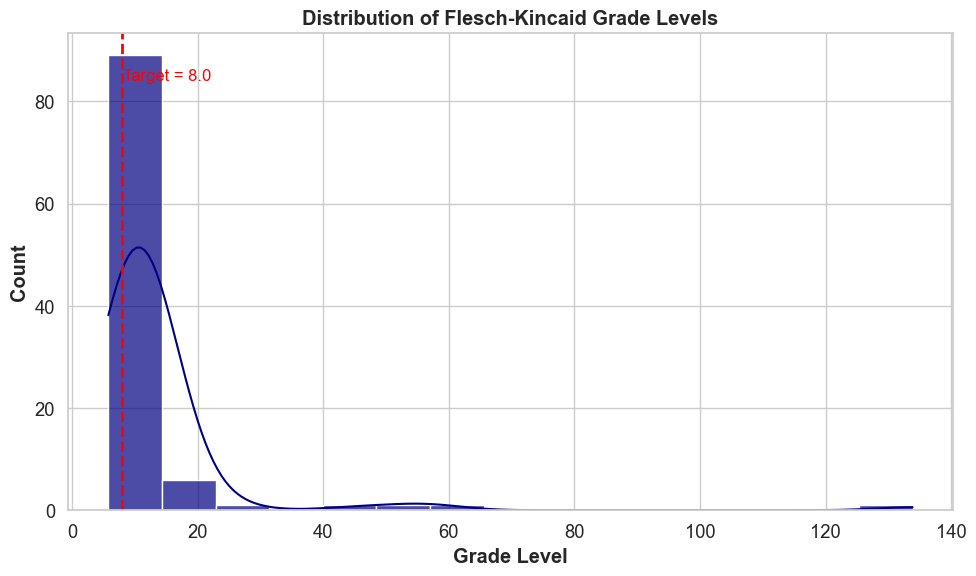

/var/folders/5q/0hckk7812vs4m11jprtzff600000gn/T/ipykernel_14724/315202407.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Metric', y='Score', data=melted, palette='Blues')


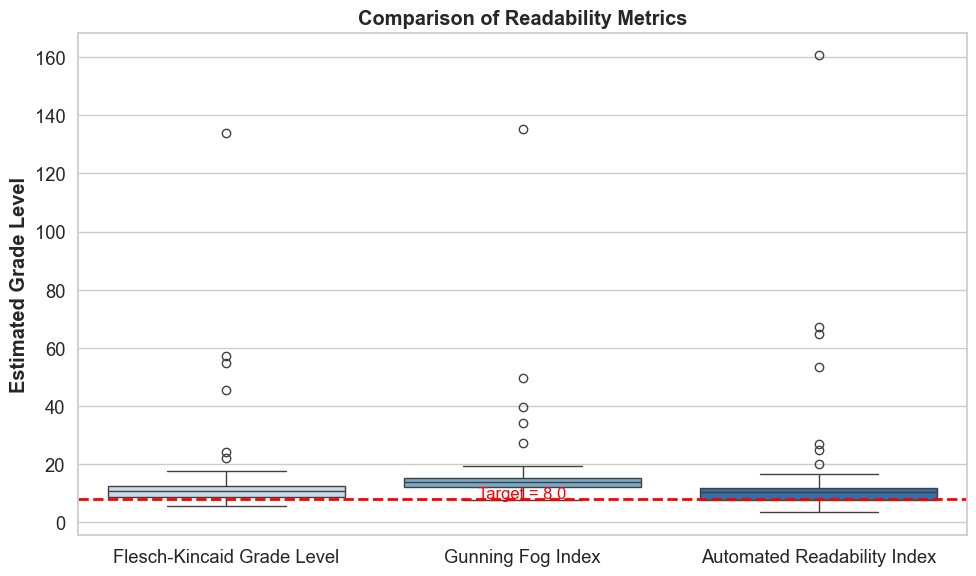

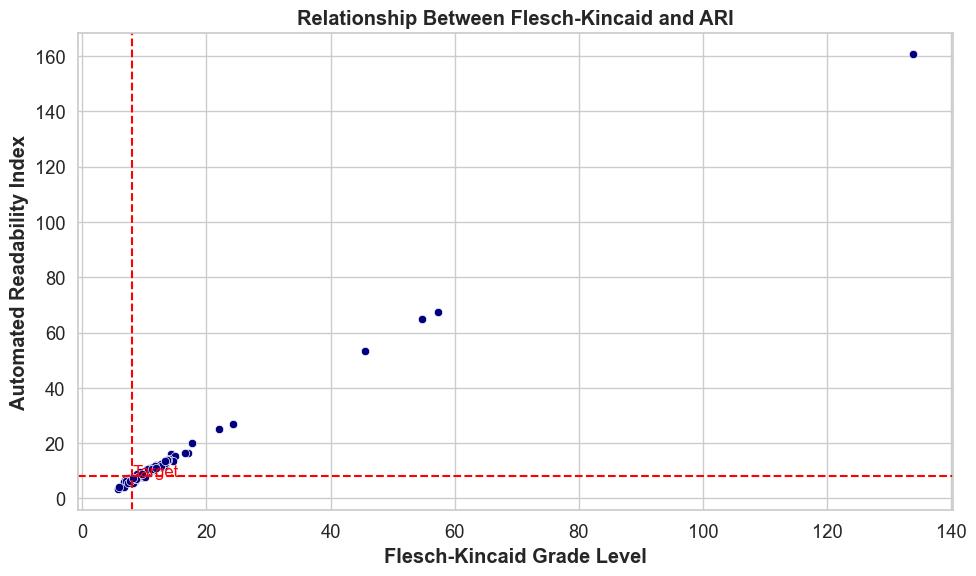

<Figure size 1000x600 with 0 Axes>

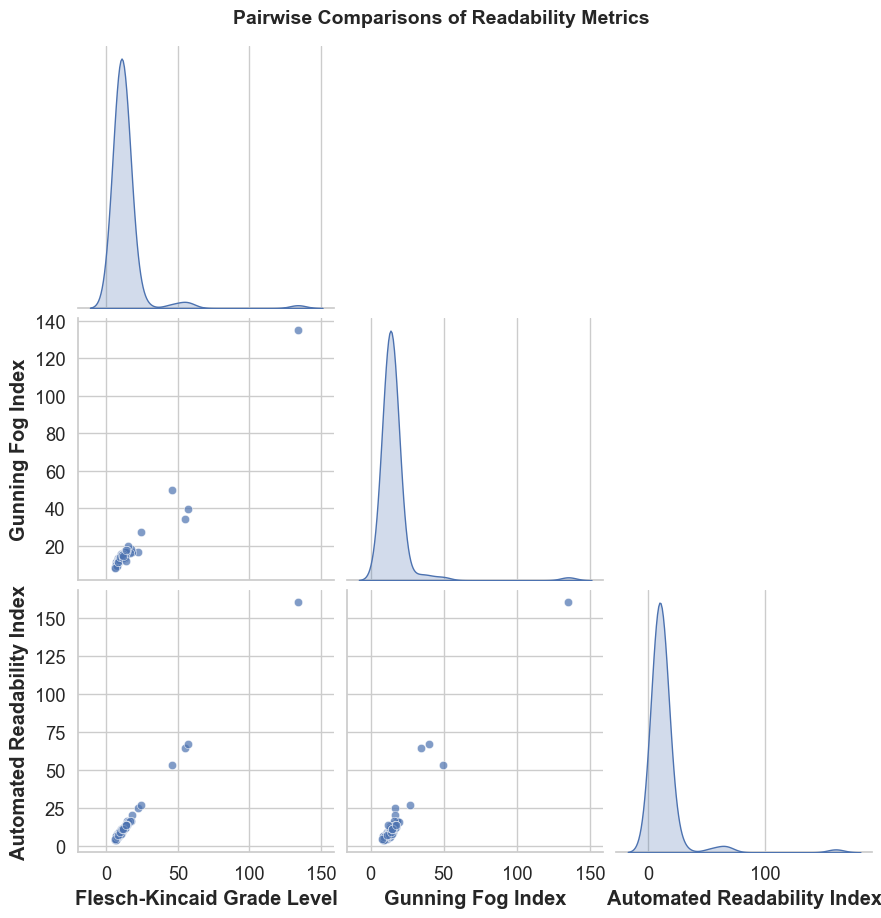

In [5]:
# Extract the texts from the dataframe
texts = df_kis['ki_text'].tolist()

fk_grade_levels = calculate_flesch_kincaid_grade_level(texts)   # returns a list of floats
gunning_fog_scores = [calculate_gunning_fog_index(t) for t in texts]
ari_scores = calculate_automated_readability_index(texts)       # returns a list of floats

# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Flesch-Kincaid Grade Level': fk_grade_levels,
    'Gunning Fog Index': gunning_fog_scores,
    'Automated Readability Index': ari_scores
})

# Set a target readability level (e.g., aiming for about 8th grade)
target_grade_level = 8.0

#-------------------------------------------
# Style Settings
#-------------------------------------------
sns.set_theme(style="whitegrid", font_scale=1.2)
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

#-------------------------------------------
# 1. Distribution Plot (Histogram + KDE) for One Metric
#    You can replicate similar plots for each metric if needed.
#-------------------------------------------
plt.figure()
sns.histplot(df['Flesch-Kincaid Grade Level'], kde=True, color='navy', alpha=0.7, bins=15)
plt.axvline(x=target_grade_level, color='red', linestyle='--', linewidth=2)
plt.title("Distribution of Flesch-Kincaid Grade Levels")
plt.xlabel("Grade Level")
plt.ylabel("Count")
plt.text(target_grade_level+0.1, plt.ylim()[1]*0.9, f"Target = {target_grade_level}", color='red', fontsize=12)
plt.tight_layout()
plt.show()

#-------------------------------------------
# 2. Boxplot for Comparing All Three Metrics
#-------------------------------------------
plt.figure()
melted = df.melt(var_name='Metric', value_name='Score')
sns.boxplot(x='Metric', y='Score', data=melted, palette='Blues')
plt.axhline(y=target_grade_level, color='red', linestyle='--', linewidth=2)
plt.title("Comparison of Readability Metrics")
plt.ylabel("Estimated Grade Level")
plt.xlabel("")
plt.text(1.0, target_grade_level+0.2, f"Target = {target_grade_level}", color='red', ha='center', fontsize=12)
plt.tight_layout()
plt.show()

#-------------------------------------------
# 3. Scatter Plot Comparing Two Metrics at a Time
#    Example: Flesch-Kincaid vs. ARI
#-------------------------------------------
plt.figure()
sns.scatterplot(x='Flesch-Kincaid Grade Level', y='Automated Readability Index', data=df, color='navy')
plt.title("Relationship Between Flesch-Kincaid and ARI")
plt.axvline(x=target_grade_level, color='red', linestyle='--', linewidth=1.5)
plt.axhline(y=target_grade_level, color='red', linestyle='--', linewidth=1.5)
plt.xlabel("Flesch-Kincaid Grade Level")
plt.ylabel("Automated Readability Index")
plt.text(target_grade_level+0.1, target_grade_level+0.1, "Target", color='red', fontsize=12)
plt.tight_layout()
plt.show()



plt.figure()
sns.pairplot(df, plot_kws={'alpha':0.7}, diag_kind='kde', corner=True, height=3)
plt.suptitle("Pairwise Comparisons of Readability Metrics", y=1.02, fontsize=14, fontweight='bold')
plt.show()
